In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sqrt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import metrics
import scipy.stats as st
%matplotlib inline
import pandas as pd


# Dataset

In [2]:
dataset=pd.read_csv("C:/Users/yazhini/Downloads/datafile (1).csv")
dataset.head(60)

,Crop,State,culcost,prodcost,profit_or_loss,production_cost,yield_y
0,ARHAR,Uttar Pradesh,23076.74,39794.05,1,1941.55,9.83
1,ARHAR,Karnataka,16528.68,17593.15,1,2172.46,7.47
2,ARHAR,Gujarat,19551.90,13468.82,0,1898.30,9.59
3,ARHAR,Andhra Pradesh,24171.65,27051.66,1,3670.54,6.42
4,ARHAR,Maharashtra,25270.26,29130.55,1,2775.80,8.72
5,COTTON,Maharashtra,33116.82,23711.44,0,2539.47,12.69
6,COTTON,Punjab,50828.83,51047.10,1,2003.76,24.39
7,COTTON,Andhra Pradesh,44756.72,49140.77,1,2509.99,17.83
8,COTTON,Gujarat,42070.44,49616.09,1,2179.26,19.05
9,COTTON,Haryana,44018.18,29918.97,0,2127.35,19.90


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             49 non-null     object 
 1   State            49 non-null     object 
 2   culcost          49 non-null     float64
 3   prodcost         49 non-null     float64
 4   profit_or_loss   49 non-null     int64  
 5   production_cost  49 non-null     float64
 6   yield_y          49 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.8+ KB


In [127]:
dataset.describe()

,Cost of Cultivation (`/Hectare),Cost of production (`/Hectare),profit_or_loss,Cost of Production (`/Quintal),Yield
count,49.000000,49.000000,49.000000,49.000000,49.000000
mean,31364.666735,31407.378571,0.653061,1620.537755,98.086735
std,20095.783569,20687.153148,0.480929,1104.990472,245.293123
min,7868.640000,5483.540000,0.000000,85.790000,1.320000
25%,19259.840000,17593.150000,0.000000,732.620000,9.590000
50%,25909.050000,27051.660000,1.000000,1595.560000,13.700000
75%,35423.480000,37945.580000,1.000000,2228.970000,36.610000
max,91442.630000,96621.160000,1.000000,5777.480000,1015.450000


# univerate analysis


# state variable

In [8]:
print(dataset.State.nunique())
print(dataset.State.unique())
print(dataset.State.max())
print(dataset.State.value_counts())

13
['Uttar Pradesh' 'Karnataka' 'Gujarat' 'Andhra Pradesh' 'Maharashtra'
 'Punjab' 'Haryana' 'Rajasthan' 'Madhya Pradesh' 'Tamil Nadu' 'Bihar'
 'Orissa' 'West Bengal']
West Bengal
Andhra Pradesh    8
Uttar Pradesh     7
Maharashtra       6
Rajasthan         5
Karnataka         5
Gujarat           4
Punjab            3
Madhya Pradesh    3
Orissa            2
Tamil Nadu        2
Haryana           2
Bihar             1
West Bengal       1
Name: State, dtype: int64


# Crop variable

In [32]:
print(dataset.Crop.nunique())
print(dataset.Crop.unique())
print(dataset.Crop.max())
print(dataset.Crop.value_counts())

10
['ARHAR' 'COTTON' 'GRAM' 'GROUNDNUT' 'MAIZE' 'MOONG' 'PADDY'
 'RAPESEED AND MUSTARD' 'SUGARCANE' 'WHEAT']
WHEAT
PADDY                   5
MAIZE                   5
COTTON                  5
GROUNDNUT               5
RAPESEED AND MUSTARD    5
SUGARCANE               5
GRAM                    5
MOONG                   5
ARHAR                   5
WHEAT                   4
Name: Crop, dtype: int64


# z score.

In [162]:
dataset1=pd.read_csv("C:/Users/yazhini/Downloads/datafile (1).csv")
dataset1.head(5)

,Crop,State,Cost of Cultivation (`/Hectare),Cost of production (`/Hectare),profit_or_loss,Cost of Production (`/Quintal),yield_y
0,ARHAR,Uttar Pradesh,23076.74,39794.05,1,1941.55,9.83
1,ARHAR,Karnataka,16528.68,17593.15,1,2172.46,7.47
2,ARHAR,Gujarat,19551.90,13468.82,0,1898.30,9.59
3,ARHAR,Andhra Pradesh,24171.65,27051.66,1,3670.54,6.42
4,ARHAR,Maharashtra,25270.26,29130.55,1,2775.80,8.72


In [28]:
dataset1.mean()

Cost of Cultivation (`/Hectare) A2+FL    20363.537347
Cost of Cultivation (`/Hectare) C2       31364.666735
Cost of Production (`/Quintal) C2         1620.537755
Yield (Quintal/ Hectare)                    98.086735
dtype: float64

# mean (yield of ARHAR crop) = 98.086735

In [29]:
dataset1.std()

Cost of Cultivation (`/Hectare) A2+FL    13561.435306
Cost of Cultivation (`/Hectare) C2       20095.783569
Cost of Production (`/Quintal) C2         1104.990472
Yield (Quintal/ Hectare)                   245.293123
dtype: float64

# std(yield of ARHAR crop) = 245.293123

In [30]:
z_score_ARHAR = (9.83 - 98.086735) / 245.293123
print(round(z_score_ARHAR, 2))

-0.36


# Z_score_ARHAR = -0.36

In [130]:
dataset2=pd.read_csv("C:/Users/yazhini/Pictures/cotton.csv")
dataset2.head(5)

,Crop,State,Cost of Cultivation (`/Hectare),Cost of production (`/Hectare),profit(1)/loss(0),Cost of Production (`/Quintal),Yield
0,COTTON,Maharashtra,33116.82,23711.44,0,2539.47,12.69
1,COTTON,Punjab,50828.83,51047.10,1,2003.76,24.39
2,COTTON,Andhra Pradesh,44756.72,49140.77,1,2509.99,17.83
3,COTTON,Gujarat,42070.44,49616.09,1,2179.26,19.05
4,COTTON,Haryana,44018.18,29918.97,0,2127.35,19.90


In [34]:
dataset2.mean()

Cost of Cultivation (`/Hectare) A2+FL    21131.252273
Cost of Cultivation (`/Hectare) C2       32460.669091
Cost of Production (`/Quintal) C2         1521.538636
Yield (Quintal/ Hectare)                   108.277727
dtype: float64

# mean (yield of COTTON crop) = 108.277727.

In [35]:
dataset2.std()

Cost of Cultivation (`/Hectare) A2+FL    14080.942037
Cost of Cultivation (`/Hectare) C2       20917.485800
Cost of Production (`/Quintal) C2         1101.320497
Yield (Quintal/ Hectare)                   257.144751
dtype: float64

# std(yield of COTTON crop) = 257.144751.

In [36]:
z_score_COTTON = (12.69 - 108.277727) / 257.144751
print(round(z_score_COTTON, 2))

-0.37


In [40]:
z_score_ARHAR = -0.36
print("z_score_ARHAR",z_score_ARHAR)

z_score_COTTON = -0.37
print("z_score_COTTON",z_score_COTTON)

if z_score_ARHAR > z_score_COTTON:
    print("ARHAR YIELD IS GREATER THAN COTTON.")
elif z_score_ARHAR == z_score_COTTON:
    print("BOTH YIELDS ARE SAME.")
else:
    print("COTTON YIELD IS GREATER THAN ARHAR.")

z_score_ARHAR -0.36
z_score_COTTON -0.37
ARHAR YIELD IS GREATER THAN COTTON.


# ARHAR YIELD IS GREATER THAN COTTON

# Naive bayers classification

In [ ]:
dataset3=pd.read_csv("C:/Users/yazhini/OneDrive/Documents/naive bayers.csv")
dataset3.head(50)

# Data pre-processing

In [8]:
x = dataset3.drop('profit_or_loss',axis=1)
y = dataset3['profit_or_loss']
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.50,random_state=42)

# Train the model

In [83]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

# Prediction

In [84]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1], dtype=int64)

# Model Evaluation

In [85]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.64


# percentage

In [86]:
accuracy = accuracy_score(y_test,y_pred)*100
accuracy

64.0

# Central limit theorm

In [20]:
dataset=pd.read_csv("C:/Users/yazhini/Downloads/datafile (1).csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             49 non-null     object 
 1   State            49 non-null     object 
 2   culcost          49 non-null     float64
 3   prodcost         49 non-null     float64
 4   profit_or_loss   49 non-null     int64  
 5   production_cost  49 non-null     float64
 6   yield_y          49 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.8+ KB


In [21]:
dataset_production_cost = dataset['production_cost']
dataset_production_cost.describe()

count      49.000000
mean     1620.537755
std      1104.990472
min        85.790000
25%       732.620000
50%      1595.560000
75%      2228.970000
max      5777.480000
Name: production_cost, dtype: float64

In [22]:
dataset_production_cost.mean()

1620.537755102041

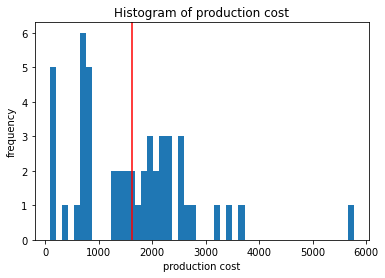

In [23]:
# plot all the observation in chol data
plt.hist(dataset_production_cost, bins=100)

plt.xlabel('production_cost')
plt.ylabel('frequency')
plt.title('Histogram of production cost')
plt.axvline(x=dataset_production_cost.mean(),color='r')

# Identifying and fitting distributions on the given data

In [7]:
dataset=pd.read_csv("C:/Users/yazhini/Downloads/datafile (1).csv")
dataset.head(60)

,Crop,State,culcost,prodcost,profit_or_loss,productioncost,yield_y
0,ARHAR,Uttar Pradesh,23076.74,39794.05,1,1941.55,9.83
1,ARHAR,Karnataka,16528.68,17593.15,1,2172.46,7.47
2,ARHAR,Gujarat,19551.90,13468.82,0,1898.30,9.59
3,ARHAR,Andhra Pradesh,24171.65,27051.66,1,3670.54,6.42
4,ARHAR,Maharashtra,25270.26,29130.55,1,2775.80,8.72
5,COTTON,Maharashtra,33116.82,23711.44,0,2539.47,12.69
6,COTTON,Punjab,50828.83,51047.10,1,2003.76,24.39
7,COTTON,Andhra Pradesh,44756.72,49140.77,1,2509.99,17.83
8,COTTON,Gujarat,42070.44,49616.09,1,2179.26,19.05
9,COTTON,Haryana,44018.18,29918.97,0,2127.35,19.90


In [30]:
dist1 = [st.norm,st.uniform,st.expon,st.logistic,st.lognorm,st.gamma]
mles1 = []

for distribution in dist1:
    pars = distribution.fit(dataset['culcost'])
    mle = distribution.nnlf(pars, dataset['culcost'])
    mles1.append(mle)

results1 = [(distribution.name, mle) for distribution, mle in zip(dist1, mles1)]
results1

[('norm', 554.5278152601388),
 ('uniform', 555.3408936868204),
 ('expon', 542.1647439251835),
 ('logistic', 550.0221956979099),
 ('lognorm', 612.6064744984446),
 ('gamma', 554.435857103065)]

# The distribution with the least MLE is the best option for fitting. In this case, it is Exponential distribution.

In [38]:
args1 = st.expon.fit(dataset['culcost'])
st.kstest(dataset['culcost'] ,'expon' , args1)

KstestResult(statistic=0.18583145460433617, pvalue=0.05919647286415275)

# Since p-value is greater than 0.05, we accept null hypothesis i.e. Expinential distribution is the best fit fot the variable

In [31]:
dist2 = [st.norm,st.uniform,st.expon,st.logistic,st.lognorm,st.gamma]
mles2 = []

for distribution in dist2:
    pars = distribution.fit(dataset['prodcost'])
    mle = distribution.nnlf(pars, dataset['prodcost'])
    mles2.append(mle)

results2 = [(distribution.name, mle) for distribution, mle in zip(dist2, mles2)]
results2

[('norm', 555.9489557101396),
 ('uniform', 559.5861715894758),
 ('expon', 546.9829933942165),
 ('logistic', 552.436769313412),
 ('lognorm', 636.6265973061877),
 ('gamma', 149287.13218315557)]

# The distribution with the least MLE is the best option for fitting. In this case, it is Exponential distribution.¶

In [40]:
args2 = st.expon.fit(dataset['prodcost'])
st.kstest(dataset['prodcost'] ,'expon', args2)

KstestResult(statistic=0.14096814916995043, pvalue=0.25913755248794423)

# Since p-value is greater than 0.05, we accept null hypothesis i.e. Expinential distribution is the best fit fot the variable.

In [33]:
dataset5=pd.read_csv("C:/Users/yazhini/Downloads/datafileMSP.csv")
dataset5.head(60)

,Crop,State,Cul cost (A2+FL),Cul cost( C2)
0,ARHAR,Uttar Pradesh,9794.05,23076.74
1,ARHAR,Karnataka,10593.15,16528.68
2,ARHAR,Gujarat,13468.82,19551.90
3,ARHAR,Andhra Pradesh,17051.66,24171.65
4,ARHAR,Maharashtra,17130.55,25270.26
5,COTTON,Maharashtra,23711.44,33116.82
6,COTTON,Punjab,29047.10,50828.83
7,COTTON,Andhra Pradesh,29140.77,44756.72
8,COTTON,Gujarat,29616.09,42070.44
9,COTTON,Haryana,29918.97,44018.18


# calculation of MSP using (a2+fl) costs 

In [21]:
A2PLUSFL= 9794.05
MSP = A2PLUSFL+ 0.5*A2PLUSFL
print('MSP CALCULATED USING (A2+FL) COST:', MSP)

MSP CALCULATED USING (A2+FL) COST: 14691.074999999999


In [35]:
dataset6=pd.read_csv("C:/Users/yazhini/Downloads/datafile A2.csv")
dataset6.head(60)

,Crop,State,Cul cost (A2+FL),MSP CALCULATED USING (A2+FL),Cul cost( C2)
0,ARHAR,Uttar Pradesh,9794.05,14691.075,23076.74
1,ARHAR,Karnataka,10593.15,15889.725,16528.68
2,ARHAR,Gujarat,13468.82,20203.230,19551.90
3,ARHAR,Andhra Pradesh,17051.66,25577.490,24171.65
4,ARHAR,Maharashtra,17130.55,25695.825,25270.26
5,COTTON,Maharashtra,23711.44,35567.160,33116.82
6,COTTON,Punjab,29047.10,43570.650,50828.83
7,COTTON,Andhra Pradesh,29140.77,43711.155,44756.72
8,COTTON,Gujarat,29616.09,44424.135,42070.44
9,COTTON,Haryana,29918.97,44878.455,44018.18


# calculation of MSP using (C2) costs

In [23]:
C2 = 23076.74
MSP = C2+0.5*C2
print('MSP CALCULATED USING (C2) COST:', MSP)

MSP CALCULATED USING (C2) COST: 34615.11


In [37]:
dataset7=pd.read_csv("C:/Users/yazhini/Downloads/datafile C2.csv")
dataset7.head(60)

,Crop,State,Cul cost (A2+FL),MSP CALCULATED USING (A2+FL),Cul cost( C2),MSP calculated using C2
0,ARHAR,Uttar Pradesh,9794.05,14691.075,23076.74,34615.110
1,ARHAR,Karnataka,10593.15,15889.725,16528.68,24793.020
2,ARHAR,Gujarat,13468.82,20203.230,19551.90,29327.850
3,ARHAR,Andhra Pradesh,17051.66,25577.490,24171.65,36257.475
4,ARHAR,Maharashtra,17130.55,25695.825,25270.26,37905.390
5,COTTON,Maharashtra,23711.44,35567.160,33116.82,49675.230
6,COTTON,Punjab,29047.10,43570.650,50828.83,76243.245
7,COTTON,Andhra Pradesh,29140.77,43711.155,44756.72,67135.080
8,COTTON,Gujarat,29616.09,44424.135,42070.44,63105.660
9,COTTON,Haryana,29918.97,44878.455,44018.18,66027.270


# COMPARING THE MSPs

In [38]:
dataset8=pd.read_csv("C:/Users/yazhini/Downloads/COMPARISON.csv")
dataset8.head(60)

,MSP CALCULATED USING (A2+FL),MSP calculated using C2
0,14691.075,34615.110
1,15889.725,24793.020
2,20203.230,29327.850
3,25577.490,36257.475
4,25695.825,37905.390
5,35567.160,49675.230
6,43570.650,76243.245
7,43711.155,67135.080
8,44424.135,63105.660
9,44878.455,66027.270


In [40]:
dataset8=pd.read_csv("C:/Users/yazhini/Downloads/COMPARISON.csv")
dataset8.head(60)

,MSP CALCULATED USING (A2+FL),MSP calculated using C2,Cost diffrence
0,14691.075,34615.110,19924.035
1,15889.725,24793.020,8903.295
2,20203.230,29327.850,9124.620
3,25577.490,36257.475,10679.985
4,25695.825,37905.390,12209.565
5,35567.160,49675.230,14108.070
6,43570.650,76243.245,32672.595
7,43711.155,67135.080,23423.925
8,44424.135,63105.660,18681.525
9,44878.455,66027.270,21148.815
